In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join

import time
from itertools import chain

sns.set()

Spot check an individual songs file to explore its format and data.

In [32]:
songs = pd.read_pickle('../data/songs_counts_200.pkl')
playlists = pd.read_pickle('../data/playlists_song_ids_200.pkl')

In [33]:
print(songs.shape)
display(songs.head())

print(playlists.shape)
display(playlists.head())

(1003760, 8)


,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri
song_id,,,,,,,,
0,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,220293,Jazz Classics,1,spotify:track:0002yNGLtYSYtc0X6ZnFvp
1,Zach Farlow,spotify:artist:2jTojc4rAsOMx6200a8Ah1,Thas What I Do,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,222727,The Great Escape 2,2,spotify:track:00039MgrmLoIzSpuYKurn9
2,Two Steps from Hell,spotify:artist:2qvP9yerCZCS0U1gZU8wYp,Nightwood,spotify:album:1BD29pKydSXe1EsHFj0GrQ,189638,Colin Frake On Fire Mountain,4,spotify:track:0006Rv1e2Xfh6QooyKJqKS
3,Little Simz,spotify:artist:6eXZu6O7nAUA5z6vLV8NKI,Mandarin Oranges Part 2,spotify:album:32RJzqlapfiU0fr2l4SSW9,198000,E.D.G.E,1,spotify:track:0007AYhg2UQbEm88mxu7js
4,Slam,spotify:artist:0Y0Kj7BOR5DM0UevuY7IvO,Movement,spotify:album:62VkRE2ucNvZDnYMCsnNDh,447534,Movement,1,spotify:track:0009mEWM7HILVo4VZYtqwc


(200000,)


284_0    [340039, 125250, 881533, 653897, 49614, 356319...
284_1    [738782, 7646, 142078, 900881, 533258, 429837,...
284_2    [552361, 135177, 507876, 865927, 638474, 55164...
284_3    [214695, 27387, 700562, 448130, 1000188, 37723...
284_4    [576080, 600, 170841, 842370, 450149, 8624, 89...
dtype: object

Verify song IDs are unique and complete with no gaps

In [34]:
assert min(songs.index.values) == 0
assert max(songs.index.values) == len(songs.index.values)-1
assert len(set(songs.index.values)) == len(songs.index.values)

In [35]:
all_songs_all_playlists = list(chain.from_iterable(playlists))
all_songs_all_playlists[0:10]

[340039, 125250, 881533, 653897, 49614, 356319, 787744, 603984, 894661, 461894]

Verify that song IDs used in playlists is the same set as those in the songs table:

In [36]:
assert set(all_songs_all_playlists) == set(songs.index.values)

## Sanity check: song IDs and playlists match up
Manual inspection of `songs284.csv` indeed shows that the song data of song IDs stored in playlist $284_0$ match those in the file:

In [37]:
songs.loc[playlists['284_0']]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri
song_id,,,,,,,,
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI
881533,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,121,spotify:track:6q4c1vPRZREh7nw3wG7Ixz
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK
49614,Leon Bridges,spotify:artist:3qnGvpP8Yth1AqSBMqON5x,River,spotify:album:4svLfrPPk2npPVuI4kXPYg,238560,Coming Home,989,spotify:track:0NeJjNlprGfZpeX2LQuN6c
356319,Ryan Amador,spotify:artist:1ihU4zSTmY0qQXhx8jEXWT,Instead,spotify:album:1t1kSv0ySypwFXKgyocRRk,355529,Ryan Amador,117,spotify:track:2kuFVY6hWX6yavTiWHE3SQ
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg
894661,Shawn Mendes,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,Never Be Alone,spotify:album:5wKylB0Zwnxz046O7po25D,215813,Handwritten,626,spotify:track:6wQSrFnJYm3evLsavFeCVT


## EDA: songs

In [38]:
songs.describe()

,duration_ms,count
count,1.003760e+06,1.003760e+06
mean,2.437604e+05,1.321844e+01
std,1.353252e+05,1.078177e+02
min,0.000000e+00,1.000000e+00
25%,1.868660e+05,1.000000e+00
50%,2.249895e+05,1.000000e+00
75%,2.737330e+05,4.000000e+00
max,1.043547e+07,9.248000e+03


<IPython.core.display.Javascript object>


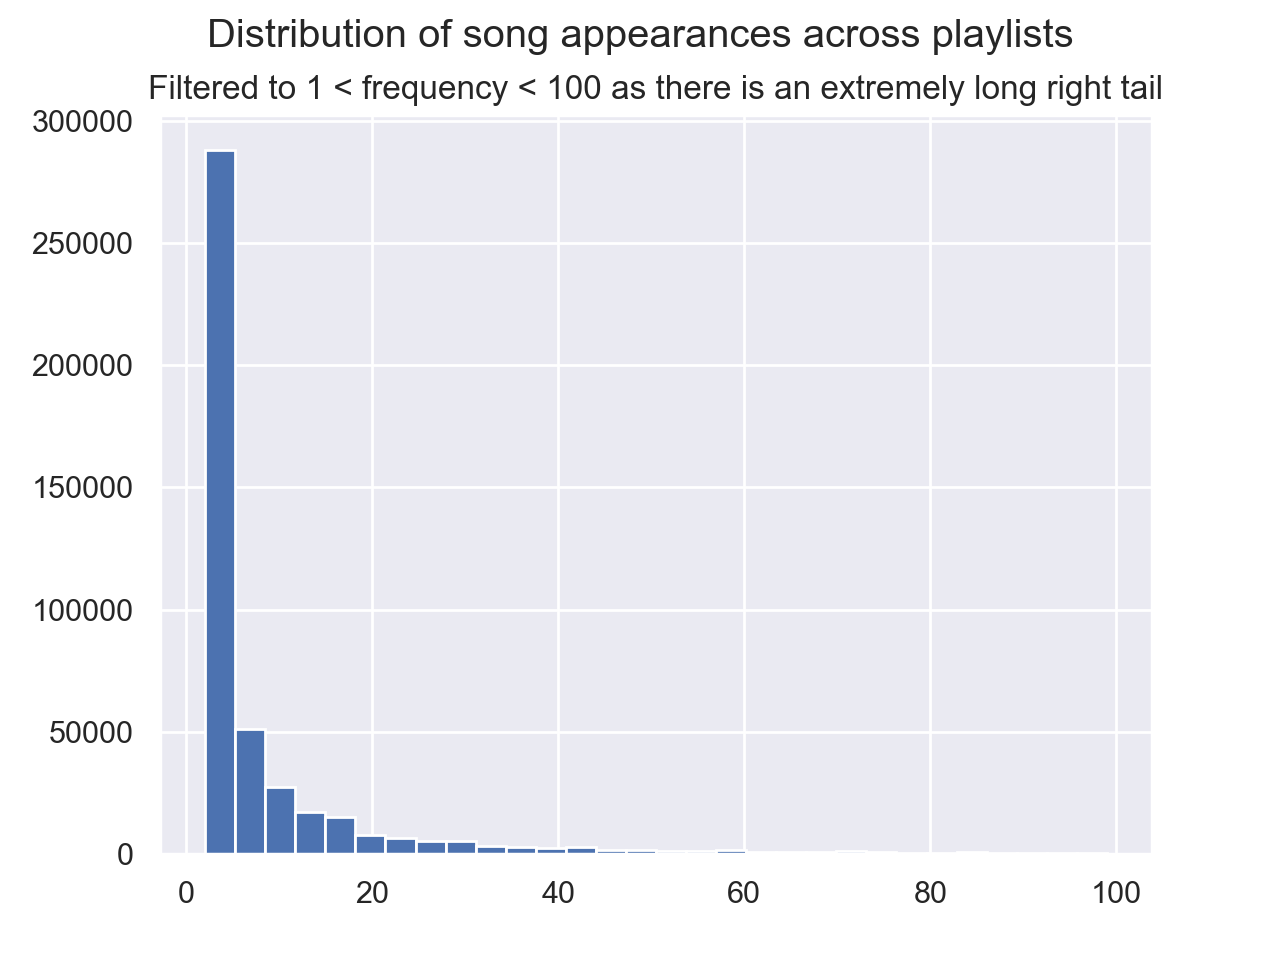

Text(0.5, 1.0, 'Filtered to 1 < frequency < 100 as there is an extremely long right tail')

In [39]:
plt.hist(songs.loc[(songs['count'] > 1) & (songs['count'] < 100), 'count'], bins = 30)
plt.suptitle('Distribution of song appearances across playlists')
plt.title('Filtered to 1 < frequency < 100 as there is an extremely long right tail')

## EDA: playlists

<IPython.core.display.Javascript object>


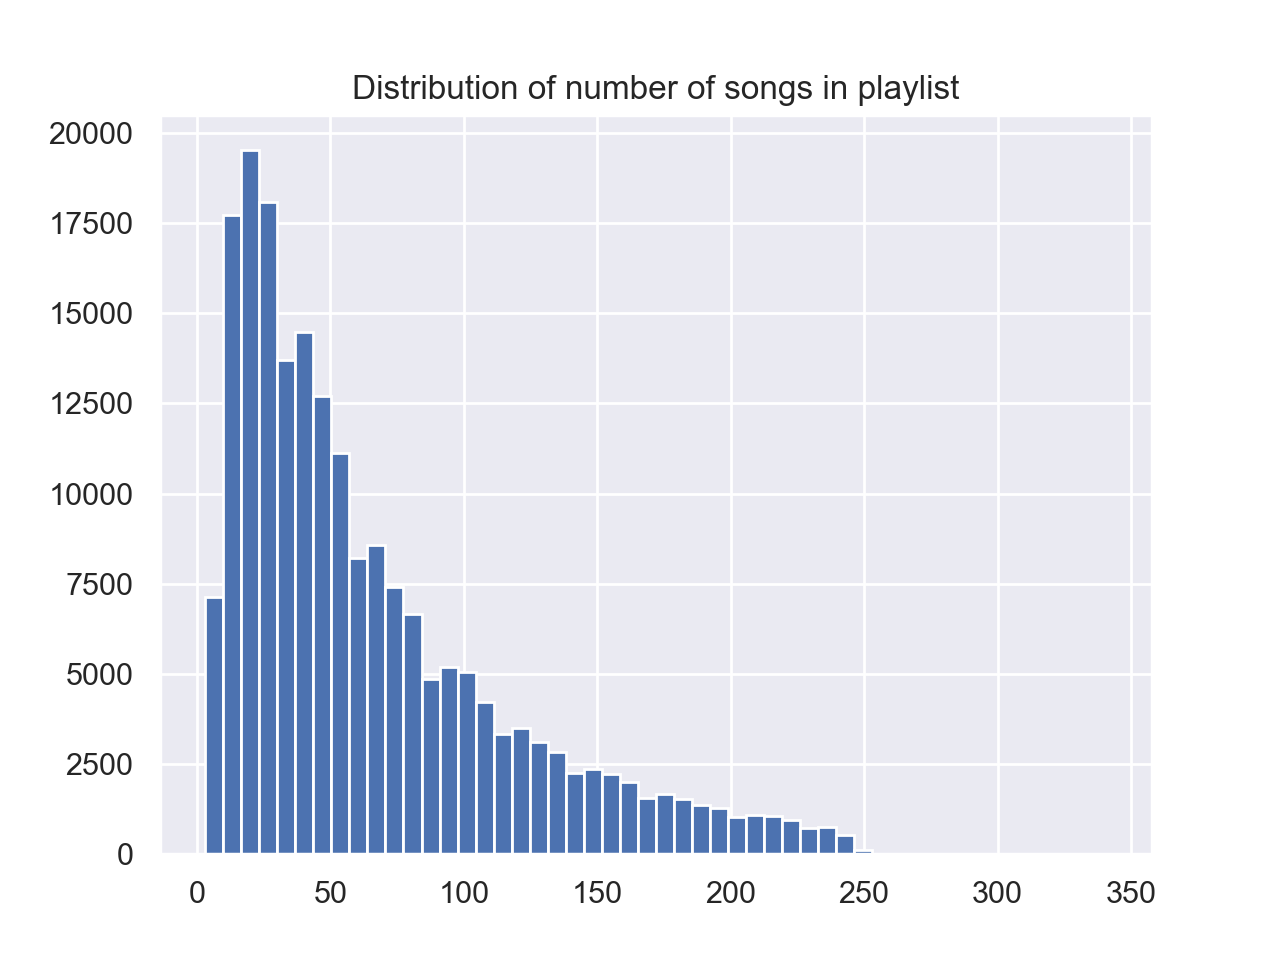

Text(0.5, 1.0, 'Distribution of number of songs in playlist')

In [40]:
playlist_lengths = np.array([len(p) for p in playlists.values], 'int')
plt.hist(playlist_lengths, bins = 50)
plt.title('Distribution of number of songs in playlist')

In [41]:
from scipy.stats import describe
print(describe(playlist_lengths))

DescribeResult(nobs=200000, minmax=(3, 341), mean=65.444445, variance=2777.1668294761225, skewness=1.274427680771606, kurtosis=1.05351435565691)


In [42]:
counts, bins = np.histogram(playlist_lengths, 
                            bins = [1, 10, 20, 30, 40, 50, 100, 200, 300, 350])
for i in range(len(counts)):
    print('[{}, {}): {}'.format(bins[i], bins[i+1], counts[i]))

[1, 10): 7141
[10, 20): 25943
[20, 30): 26773
[30, 40): 22633
[40, 50): 19013
[50, 100): 55300
[100, 200): 36902
[200, 300): 6294
[300, 350): 1


## Dimensionality reduction
We have a matrix of $1,000,000$ rows times $200,000$ features. This is a massive dataset. When we add in the metadata with song, album, and artist information this will only grow to, say, $200,100$ features. This is a challenge for several reasons:
- The non-binary features will potentially get drowned out by the playlist indicators. Particularly if we do unsupervised learning there is no label to inform the algorithm of the importance of one feature versus another, so all the $200,000$ playlist indicators will drown out the $100$ non-binary features containing potentially more important information.
- Even the longest playlist has fewer than $350$ songs. With $200,000$ indicators, this means every indicator will have at least $99.825\%$ sparsity. A lot of algorithms will either drop or struggle with such near-zero-variance features.

We therefore need a way to reduce the dimensionality

Alternatives:
- PCA is not really an alternative, as it assumes continuous data (works with covariance matrix), and the dimensions have very, very low variance.

Since there seem to be no actual dimensionality reduction method we can use, we can reduce scope by:
- Limiting to playlists above or within a range of certain lenghts
- Limiting to songs that appear at least $n$ times

**Limit to songs that appear at least $n$ times across all the playlists**.

In [43]:
n = 10

songs_keep_ind = songs.loc[songs['count'] >= n].index.values
len(songs_keep_ind), songs_keep_ind

(124828, array([     23,      27,      30, ..., 1003716, 1003724, 1003729]))

**Limit to playlists of length within range $l$**

In [44]:
l = [50, 100]

playlists_keep_ind = np.where(
    np.logical_and(playlist_lengths >= l[0], playlist_lengths <= l[1]))[0]

print(len(playlists_keep_ind))

len(playlists_keep_ind), playlists_keep_ind[0:10]

56163


(56163, array([ 1,  4,  5,  6,  8, 11, 16, 18, 24, 28]))

In [45]:
# Crashes the kernel
#keep_playlists = indicators[:, keep_playlists_ind]

## Widening songs df with indicators for playlists we wish to keep and songs we wish to keep

In [48]:
indicators_sub = np.zeros((songs.shape[0], len(playlists_keep_ind)), 'int')
print(indicators_sub.shape)

for i, s in enumerate(playlists[playlists_keep_ind]):
    indicators_sub[s, i] = 1
    
print(indicators_sub)

(1003760, 56163)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Kernel crash
# Limit to songs we wish to keep
#indicators_sub = indicators_sub[songs_keep_ind, :]

In [ ]:
print(indicators_sub.shape)

## Widening songs df with indicators for playlists we wish to keep

In [16]:
indicators_sub = np.zeros((songs.shape[0], len(keep_playlists_ind)), 'int')
print(indicators_sub.shape)

for i, s in enumerate(playlists[keep_playlists_ind]):
    indicators_sub[s, i] = 1
    
print(indicators_sub)

(1003760, 56163)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
# Make into dataframe for joining with songs dataframe
wide_indicators_sub = pd.DataFrame(indicators_sub)
wide_indicators_sub.columns = playlists.index.values[keep_playlists_ind]
wide_indicators_sub.index.name = 'song_id'
print(wide_indicators_sub.shape)
display(wide_indicators_sub.head())

(1003760, 56163)


,284_1,284_4,284_5,284_6,284_8,284_11,284_16,284_18,284_24,284_28,...,283_957,283_961,283_969,283_974,283_976,283_983,283_987,283_991,283_993,283_996
song_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### K-Means to group playlist presence into clusters
##### Dimensionality reduction: for a new song, get the cluster of playlists that it belongs to and use that as a feature

Also crashes the kernel...

In [18]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters = 8)
#kmeans.fit(indicators_sub)
#kmeans.labels_

## Widening songs df with indicators for all playlists

Create 2D Numpy array of indicators for each song (row) being in each playlist (column), so that all information is contained in one dataframe and we can compute distances and make comparisons of songs being in the same playlist(s).

In [24]:
indicators = np.zeros((songs.shape[0], playlists.shape[0]), 'int')
print(indicators.shape)

for i, s in enumerate(playlists):
    indicators[s, i] = 1
    
print(indicators)

(1003760, 200000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
# Crashes the kernel, for some reason (maybe because it's HUGE)
#np.mean(indicators, axis = 1)

# Verify that it worked as intended
assert sum(indicators[:, 0]) == len(playlists[0])
assert sum(indicators[:, 1000]) == len(playlists[1000])

In [26]:
#assert np.mean(indicators, axis = 1) == playlist_lengths

In [27]:
# Make into dataframe for joining with songs dataframe
wide_indicators = pd.DataFrame(indicators)
wide_indicators.columns = playlists.index.values
wide_indicators.index.name = 'song_id'
print(wide_indicators.shape)
display(wide_indicators.head())

(1003760, 200000)


,284_0,284_1,284_2,284_3,284_4,284_5,284_6,284_7,284_8,284_9,...,283_990,283_991,283_992,283_993,283_994,283_995,283_996,283_997,283_998,283_999
song_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**From here the kernel crashes.**  
Trying to save $1,000,000*200,000 = 200,000,000,000$ cells in a df, either as a *csv* or *pickle*, crashes the kernel.

In [ ]:
#wide_indicators.to_pickle('../data/wide_indicators_'+str(len(playlists)//1000)+'.pkl')

In [ ]:
# Save wide of only indicators
#wide_indicators.to_csv('../data/wide_indicators_'+str(len(playlists)//1000)+'.csv')

In [ ]:
# Join with songs dataframe
#songs_wide = wide.join(songs, on = 'song_id', how = 'inner')
#print(songs_wide.shape)
#display(songs_wide)

### Demo joining into widened

In [ ]:
df1 = pd.DataFrame(np.zeros((8, 4), 'int'))
df1.columns = playlists.index.values[0:4]
df1.index.name = 'song_id'
display(df1)

df2 = pd.DataFrame(np.ones((8, 2), 'float'))
df2.columns = ['A', 'B']
df2.index.name = 'song_id'
display(df2)

display(df2.join(df1, on = 'song_id', how = 'inner'))